In [174]:
import pandas as pd

In [175]:
results_df = pd.DataFrame(columns = ["Num Sharders", "Num etcd StatefulSets", "Median Response Time", "Average Response Time", "Requests/s", "Request count", "90%", "95%", "99%"])

In [176]:
results_df

,Num Sharders,Num etcd StatefulSets,Median Response Time,Average Response Time,Requests/s,Request count,90%,95%,99%


In [177]:
tests_dict = {
    "1a": {
        "replicas": 1,
        "shards": 7,
    },
    "1b": {
        "replicas": 5,
        "shards": 7,
    },
    "1c": {
        "replicas": 10,
        "shards": 7,
    },
    "1d": {
        "replicas": 20,
        "shards": 7,
    },
    "1e_2d": {
        "replicas": 30,
        "shards": 7,
    },
    "2a": {
        "replicas": 30,
        "shards": 1,
    },
    "2b": {
        "replicas": 30,
        "shards": 3,
    },
    "2c": {
        "replicas": 30,
        "shards": 5,
    }
}

In [ ]:
for test_name in tests_dict.keys():
    df = pd.read_csv(f"{test_name}/results_stats.csv")
    row = df.iloc[202]
    data = {"Num Sharders": tests_dict[test_name]["replicas"], 
            "Num etcd StatefulSets": tests_dict[test_name]["shards"], 
            "Median Response Time": row['Median Response Time'], 
            "Average Response Time": row['Average Response Time'], 
            "Requests/s": row["Requests/s"], 
            "Request count": row["Request Count"], 
            "99%": row["99%"], 
            "95%": row["95%"], 
            "90%": row["90%"]}
    results_df = results_df.append(data, ignore_index=True)

In [179]:
results_df

,Num Sharders,Num etcd StatefulSets,Median Response Time,Average Response Time,Requests/s,Request count,90%,95%,99%
0,1.0,7.0,9100.0,9027.555071,53.672098,16061.0,9800.0,10000.0,14000.0
1,5.0,7.0,2000.0,1926.599984,254.649579,76177.0,2400.0,2600.0,3200.0
2,10.0,7.0,1000.0,1065.158066,460.834784,137860.0,1400.0,1600.0,2300.0
3,20.0,7.0,600.0,651.272174,752.676653,225018.0,1000.0,1200.0,1600.0
4,30.0,7.0,360.0,390.454254,1256.113252,376371.0,580.0,710.0,1100.0
5,30.0,1.0,530.0,578.039842,846.451945,252772.0,990.0,1000.0,1300.0
6,30.0,3.0,380.0,402.570811,1209.319719,362272.0,560.0,650.0,1000.0
7,30.0,5.0,340.0,372.017162,1318.874629,394895.0,550.0,660.0,1000.0


In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 8]

In [181]:
sharder_df = results_df.iloc[:5]
shards_df = results_df.iloc[4:]

In [182]:
shards_df = shards_df.sort_values(by="Num etcd StatefulSets")

In [183]:
shards_df

,Num Sharders,Num etcd StatefulSets,Median Response Time,Average Response Time,Requests/s,Request count,90%,95%,99%
5,30.0,1.0,530.0,578.039842,846.451945,252772.0,990.0,1000.0,1300.0
6,30.0,3.0,380.0,402.570811,1209.319719,362272.0,560.0,650.0,1000.0
7,30.0,5.0,340.0,372.017162,1318.874629,394895.0,550.0,660.0,1000.0
4,30.0,7.0,360.0,390.454254,1256.113252,376371.0,580.0,710.0,1100.0


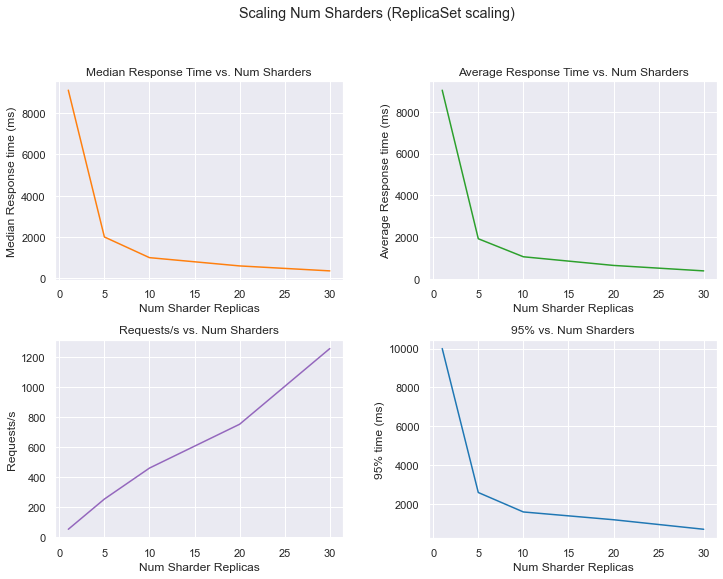

In [184]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)
axs[0, 0].plot(sharder_df['Num Sharders'], sharder_df['Median Response Time'], 'tab:orange')
axs[0, 0].set_title("Median Response Time vs. Num Sharders")
axs[0, 0].set(ylabel="Median Response time (ms)", xlabel="Num Sharder Replicas")

axs[0, 1].plot(sharder_df['Num Sharders'], sharder_df['Average Response Time'], 'tab:green')
axs[0, 1].set_title("Average Response Time vs. Num Sharders")
axs[0, 1].set(ylabel="Average Response time (ms)", xlabel="Num Sharder Replicas")

axs[1, 0].plot(sharder_df['Num Sharders'], sharder_df['Requests/s'], 'tab:purple')
axs[1, 0].set_title("Requests/s vs. Num Sharders")
axs[1, 0].set(ylabel="Requests/s", xlabel="Num Sharder Replicas")


axs[1, 1].plot(sharder_df['Num Sharders'], sharder_df['95%'], 'tab:blue')
axs[1, 1].set_title("95% vs. Num Sharders")
axs[1, 1].set(ylabel="95% time (ms)", xlabel="Num Sharder Replicas")

fig.suptitle("Scaling Num Sharders (ReplicaSet scaling)")
plt.subplots_adjust(top=.85, wspace=0.3, hspace=0.3)
plt.savefig("Num Sharders Graphs ReplicaSet")

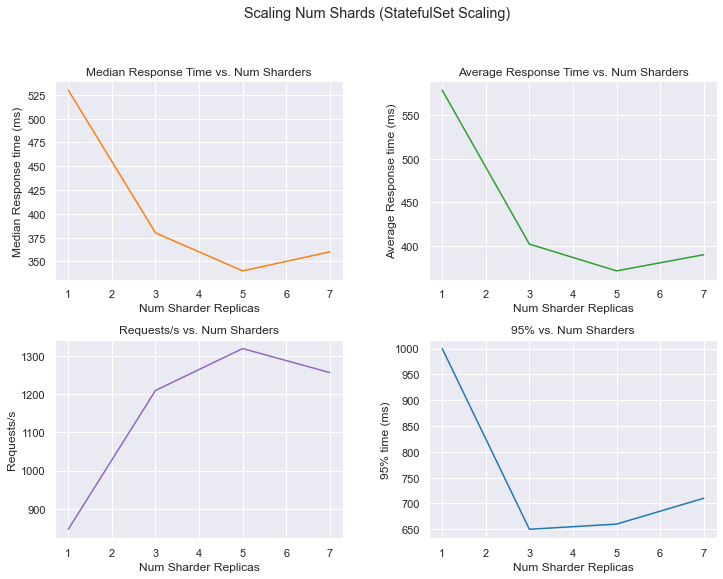

In [185]:
fig, axs = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)
axs[0, 0].plot(shards_df['Num etcd StatefulSets'], shards_df['Median Response Time'], 'tab:orange')
axs[0, 0].set_title("Median Response Time vs. Num Sharders")
axs[0, 0].set(ylabel="Median Response time (ms)", xlabel="Num Sharder Replicas")

axs[0, 1].plot(shards_df['Num etcd StatefulSets'], shards_df['Average Response Time'], 'tab:green')
axs[0, 1].set_title("Average Response Time vs. Num Sharders")
axs[0, 1].set(ylabel="Average Response time (ms)", xlabel="Num Sharder Replicas")

axs[1, 0].plot(shards_df['Num etcd StatefulSets'], shards_df['Requests/s'], 'tab:purple')
axs[1, 0].set_title("Requests/s vs. Num Sharders")
axs[1, 0].set(ylabel="Requests/s", xlabel="Num Sharder Replicas")


axs[1, 1].plot(shards_df['Num etcd StatefulSets'], shards_df['95%'], 'tab:blue')
axs[1, 1].set_title("95% vs. Num Sharders")
axs[1, 1].set(ylabel="95% time (ms)", xlabel="Num Sharder Replicas")

fig.suptitle("Scaling Num Shards (StatefulSet Scaling)")
plt.subplots_adjust(top=.85, wspace=0.3, hspace=0.3)
plt.savefig("Num Shards Graphs StatefulSet")